**Import** **Module** **and data**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import savetxt
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Support Vector Machines
from sklearn.svm import LinearSVC
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from   sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import  KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dataset = pd.read_csv('training.csv',engine='python' )
dataset_test = pd.read_csv('test.csv',engine='python' )
dataset.head()


,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V554,V555,V556,V557,V558,V559,V560,V561,V562,V563
0,1,subject,activity,F1,F2,F3,F4,F5,F6,F7,...,F552,F553,F554,F555,F556,F557,F558,F559,F560,F561
1,2,1,5,0.043579674,-0.005970221,-0.035054344,-0.99538116,-0.988365863,-0.937382005,-0.995007045,...,-0.012235894,-0.314848353,-0.713307812,-0.112754341,0.030400372,-0.464761386,-0.018445884,-0.841558511,0.179912811,-0.051718416
2,3,1,5,0.039480037,-0.002131276,-0.029067362,-0.998347999,-0.982944945,-0.971272882,-0.998701962,...,0.202803809,-0.603199224,-0.860676901,0.053476955,-0.007434566,-0.73262621,0.703510588,-0.845092399,0.18026111,-0.047436337
3,4,1,5,0.039977781,-0.005152716,-0.022650708,-0.995482127,-0.977313843,-0.984759524,-0.996414838,...,0.440079356,-0.40442749,-0.761847228,-0.118559255,0.177899475,0.100699208,0.808529075,-0.849230131,0.180609558,-0.042271363
4,5,1,5,0.039784558,-0.011808778,-0.028915779,-0.9961941,-0.988568594,-0.993255602,-0.996994335,...,0.43089077,-0.13837282,-0.491604347,-0.036787973,-0.012892494,0.640011043,-0.485366445,-0.848946592,0.181907092,-0.040826223


**Binary Classification** 

Classify the activity into static(0) and dynamic(1)

The following models are included:  

(1) Support Vector Machine with kenel: linear, poly, rbf, sigmoid. 

(2) Decision Tree 

(3) Guassian Naive Bayes 

(4) K-Nearest Neighbors 

(5) Logistic Regression 

(6) Linear Discriminant Analysis 

(7) Quadratic Discriminant Analysis  

(8) Random Forest  

(9) Voting Classifier 

(10) Neutral Network 

(11) Bagging Classifier  

(12) AdaBoost Classifier 

(13) Gaussian Process Classifier with RBF kernel  

(14) SGD Classifier 

(15) Multinomial Logistic Regression

(16) Gradient Boost Classifier

**Step 1: Enable Data**

In [4]:
List0 = ['4','5','6']
List1 = ['1','2','3']
List2 = ['7','8','9','10','11','12']
dataset["V0"] = np.where(dataset['V2'].isin(List1),'1','0')
ytrain = dataset["V0"]
dataset

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V555,V556,V557,V558,V559,V560,V561,V562,V563,V0
0,1,subject,activity,F1,F2,F3,F4,F5,F6,F7,...,F553,F554,F555,F556,F557,F558,F559,F560,F561,0
1,2,1,5,0.043579674,-0.005970221,-0.035054344,-0.99538116,-0.988365863,-0.937382005,-0.995007045,...,-0.314848353,-0.713307812,-0.112754341,0.030400372,-0.464761386,-0.018445884,-0.841558511,0.179912811,-0.051718416,0
2,3,1,5,0.039480037,-0.002131276,-0.029067362,-0.998347999,-0.982944945,-0.971272882,-0.998701962,...,-0.603199224,-0.860676901,0.053476955,-0.007434566,-0.73262621,0.703510588,-0.845092399,0.18026111,-0.047436337,0
3,4,1,5,0.039977781,-0.005152716,-0.022650708,-0.995482127,-0.977313843,-0.984759524,-0.996414838,...,-0.40442749,-0.761847228,-0.118559255,0.177899475,0.100699208,0.808529075,-0.849230131,0.180609558,-0.042271363,0
4,5,1,5,0.039784558,-0.011808778,-0.028915779,-0.9961941,-0.988568594,-0.993255602,-0.996994335,...,-0.13837282,-0.491604347,-0.036787973,-0.012892494,0.640011043,-0.485366445,-0.848946592,0.181907092,-0.040826223,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,7764,30,2,0.048048374,-0.042445161,-0.065884336,-0.195447967,-0.278326363,-0.219953526,-0.282233132,...,-0.596760198,-0.879025634,-0.190436861,0.829718416,0.206972154,-0.425618579,-0.792291739,0.238580336,0.056019937,1
7764,7765,30,2,0.037638604,0.006430371,-0.044344723,-0.235372031,-0.30268012,-0.232843488,-0.322482719,...,-0.404417928,-0.684496226,0.064906712,0.875679049,-0.879032789,0.40021936,-0.772287652,0.252652789,0.056251833,1
7765,7766,30,2,0.037450938,-0.002724424,0.021009408,-0.2182808,-0.37808216,-0.076950379,-0.304446475,...,0.000206574,-0.317314291,0.052805928,-0.266724365,0.864404011,0.701168816,-0.779566335,0.249121453,0.047070771,1
7766,7767,30,2,0.044011045,-0.004535781,-0.051242204,-0.219202106,-0.38334992,-0.08103469,-0.310418503,...,0.037918739,-0.356579108,-0.101360118,0.700739689,0.936673944,-0.58947895,-0.78560327,0.246408672,0.031700029,1


In [5]:
xtrain=dataset.iloc[1:,3:564]
xtrain
ytrain=ytrain.iloc[1:]
dataset_test['V2']=0
dataset_test_x = pd.read_csv('xtest.csv',engine='python' )
dataset_test_x
xtest2=dataset_test_x.iloc[0:,1:]
xtest2
dataset_test.head()
models = {}
xtrain=dataset.iloc[1:,3:564]

dataset_test_x = pd.read_csv('xtest.csv',engine='python' )

**Step 2: Split Data**

In [6]:
#I tried several ways to split the data, including 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4. 
#Considering the limited space here, this version of code only including the 0.4, 
#which meeans divide the data into train(60%) and test(40%) data. 
#You can easily change the fraction as you want.
X_train31, X_test31, y_train31, y_test31 = train_test_split(xtrain, ytrain , test_size=0.4, random_state=0)

**Step 3: Build base model**

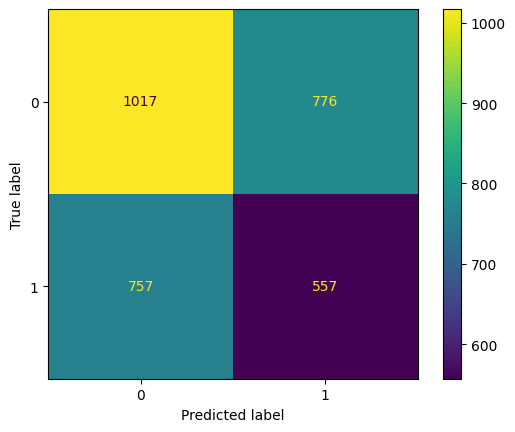

In [7]:
# Initialize Estimator
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train31,y_train31)

# Check for Model Accuracy

cm = confusion_matrix(y_test31,dummy.predict(X_test31), labels=dummy.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dummy.classes_)
disp.plot()
plt.show()

**Step 4: Find the opimal parameters**

In [ ]:
# Define the parameter grid for random_state
param_grid = {'random_state': range(0, 101)}

# Define the SVM classifier
svc = SVC()

# Define the grid search object
grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train31, y_train31)

# Print the best random_state parameter value and the corresponding mean test score
print('Best random_state:', grid_search.best_params_['random_state'])
print('Mean test score:', grid_search.best_score_)

Best random_state: 0
Mean test score: 0.9991416309012877


In [ ]:
# create decision tree classifier
dtc = DecisionTreeClassifier()

# define parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

# perform grid search
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(X_train31, y_train31)

# print optimal parameters
print(grid_search.best_params_)

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 8}


In [ ]:
# create logistic regression classifier
lr = LogisticRegression()

# define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# perform grid search
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train31, y_train31)

# print optimal parameters
print(grid_search.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# create LDA classifier
lda = LinearDiscriminantAnalysis()

# define parameter grid
param_grid = {
    'solver': ['svd', 'lsqr'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
    'n_components': [1, 2, 3]
}

# perform grid search
grid_search = GridSearchCV(lda, param_grid, cv=5)
grid_search.fit(X_train31, y_train31)

# print optimal parameters
print(grid_search.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

----------------------------------------------------------------------------

{'n_components': 1, 'shrinkage': None, 'solver': 'svd'}


In [ ]:
# create KNN classifier
knn = KNeighborsClassifier()

# define parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train31, y_train31)

# print optimal parameters
print(grid_search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
# create QDA classifier
qda = QuadraticDiscriminantAnalysis()

# define parameter grid
param_grid = {
    'reg_param': [0.0, 0.1, 0.5, 0.9]
}

# perform grid search
grid_search = GridSearchCV(qda, param_grid, cv=5)
grid_search.fit(X_train31, y_train31)

# print optimal parameters
print(grid_search.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminan

{'reg_param': 0.1}


In [ ]:
# Define the parameter grid to search over
param_grid = {
    'max_depth': [5, 10, 20],
    'class_weight': [None, 'balanced'],
    'n_jobs': [-1, 1, 2],
    'random_state': [0,42, 123, 456]
}

# Create the random forest classifier
clf = RandomForestClassifier()

# Perform the grid search using cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train31, y_train31)

# Print the best hyperparameters and the corresponding validation score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Validation score: {grid_search.best_score_:.2f}")

Best hyperparameters: {'class_weight': 'balanced', 'max_depth': 10, 'n_jobs': -1, 'random_state': 456}
Validation score: 1.00


In [ ]:
# define parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

# create SVM classifier
svc = SVC()

# perform grid search
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train31, y_train31)

# print optimal parameters
print(grid_search.best_params_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


**Step 5: Training data evaluation**

In [ ]:
# Build multiple classifiers
svm0 = LinearSVC()
dt = DecisionTreeClassifier( max_depth=4, min_samples_leaf= 2,min_samples_split= 4)
nb = GaussianNB()
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
lr = LogisticRegression(C= 1, penalty= 'l2', solver='liblinear')
# adab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100)
lda = LinearDiscriminantAnalysis(n_components=1, shrinkage=None, solver='svd')
qda = QuadraticDiscriminantAnalysis(reg_param= 0.1)
#xgb = xgb.XGBClassifier()
svm2 = SVC(random_state=0)
clf = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=0)
svm3 = SVC(C=0.1,gamma=0.1,kernel='linear')
svm4 = SVC(kernel='poly')
svm5 = SVC(kernel='rbf')
svm6 = SVC(kernel='sigmoid')
# Define the ensemble classifier
ensemble = VotingClassifier(estimators=[('dt', svm0), ('lr', svm3), ('svm', svm4)], voting='hard')
# Define the ensemble classifier
ensemble2 = VotingClassifier(estimators=[('dt', dt ), ('lr', lr), ('knn', knn ), ('lda', lda), ('qda', qda),('svm6', svm6), ('nb', nb),('clf', clf),('svm0', svm0) ,('svm2', svm2),('svm3',svm3),('svm4', svm4 )], voting='hard')
ensemble3 = VotingClassifier(estimators=[('dt', dt ), ('lr', lr), ('svm', svm0),('nb',nb),('knn', knn ), ('lda', lda), ('qda', qda), ('svm2', svm2),('svm3',svm3),('svm4', svm4 ), ('svm5', svm5), ('svm6', svm6)], voting='hard')

# Train the classifiers on the training set
svm0.fit(X_train31, y_train31)
svm3.fit(X_train31, y_train31)
svm4.fit(X_train31, y_train31)
svm5.fit(X_train31, y_train31)
svm6.fit(X_train31, y_train31)

dt.fit(X_train31, y_train31)
nb.fit(X_train31, y_train31)
knn.fit(X_train31, y_train31)
lr.fit(X_train31, y_train31)
#adab.fit(X_train32, y_train32)
lda.fit(X_train31, y_train31)
qda.fit(X_train31, y_train31)
#xgb.fit(X_train31, y_train31)
clf.fit(X_train31, y_train31)
ensemble.fit(X_train31, y_train31)
ensemble2.fit(X_train31, y_train31)
ensemble3.fit(X_train31, y_train31)
# Predict the test set using the trained classifiers
svm0_pred = svm0.predict(X_test31)
svm3_pred = svm3.predict(X_test31)
svm4_pred = svm4.predict(X_test31)
svm5_pred = svm5.predict(X_test31)
svm6_pred = svm6.predict(X_test31)

dt_pred = dt.predict(X_test31)
nb_pred = nb.predict(X_test31)
knn_pred = knn.predict(X_test31)
lr_pred = lr.predict(X_test31)
#adab_pred = adab.predict(X_test32)
lda_pred = lda.predict(X_test31)
qda_pred = qda.predict(X_test31)
#xgb_pred = xgb.predict(X_test31)
clf_pred = clf.predict(X_test31)
ensemble_pred = ensemble.predict(X_test31)
ensemble_pred2 = ensemble2.predict(X_test31)
ensemble_pred3 = ensemble3.predict(X_test31)
# Evaluate the accuracy of each classifier on the test set
svm0_acc = accuracy_score(y_test31, svm0_pred)
svm3_acc = accuracy_score(y_test31, svm3_pred)
svm4_acc = accuracy_score(y_test31, svm4_pred)
svm5_acc = accuracy_score(y_test31, svm5_pred)
svm6_acc = accuracy_score(y_test31, svm6_pred)

dt_acc = accuracy_score(y_test31, dt_pred)
nb_acc = accuracy_score(y_test31, nb_pred)
knn_acc = accuracy_score(y_test31, knn_pred)
lr_acc = accuracy_score(y_test31, lr_pred)
#adab_acc = accuracy_score(y_test32, adab_pred)
lda_acc = accuracy_score(y_test31, lda_pred)
qda_acc = accuracy_score(y_test31, qda_pred)
#xgb_acc = accuracy_score(y_test31, xgb_pred)
clf_acc = accuracy_score(y_test31, clf_pred)
ensemble_acc = accuracy_score(y_test31, ensemble_pred)
ensemble_acc2 = accuracy_score(y_test31, ensemble_pred2)
ensemble_acc3 = accuracy_score(y_test31, ensemble_pred3)

print('svm0 Classifier accuracy:', svm0_acc)
print('svm3 Classifier accuracy:', svm3_acc)
print('svm4 Classifier accuracy:', svm4_acc)
print('svm5 Classifier accuracy:', svm5_acc)
print('svm6 Classifier accuracy:', svm6_acc)

print('dt Classifier accuracy:', dt_acc)
print('nb Classifier accuracy:', nb_acc)
print('K-Nearest Neighbors Classifier accuracy:', knn_acc)
print('Logistic Regression Classifier accuracy:', lr_acc)
#print('adab Classifier accuracy:', adab_acc)
print('lda Classifier accuracy:', lda_acc)
print('qda Classifier accuracy:', qda_acc)
#print('xgb Classifier accuracy:', xgb_acc)
print('clf Classifier accuracy:', clf_acc)
print('ensemble Classifier accuracy:', ensemble_acc)
print('ensemble2 Classifier accuracy:', ensemble_acc2)
print('ensemble3 Classifier accuracy:', ensemble_acc3)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib

svm0 Classifier accuracy: 0.9996781461216607
svm3 Classifier accuracy: 0.9996781461216607
svm4 Classifier accuracy: 1.0
svm5 Classifier accuracy: 0.9993562922433216
svm6 Classifier accuracy: 0.9893788220148053
dt Classifier accuracy: 0.9967814612166077
nb Classifier accuracy: 0.9874476987447699
K-Nearest Neighbors Classifier accuracy: 0.9980688767299646
Logistic Regression Classifier accuracy: 1.0
lda Classifier accuracy: 0.9996781461216607
qda Classifier accuracy: 0.9993562922433216
clf Classifier accuracy: 0.9996781461216607
ensemble Classifier accuracy: 0.9996781461216607
ensemble2 Classifier accuracy: 0.9996781461216607
ensemble3 Classifier accuracy: 0.9996781461216607


In [ ]:
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train31, y_train31)
bg_pred = bg.predict(X_test31)
bg_acc = accuracy_score(y_test31, bg_pred)
print('bg Classifier accuracy:', bg_acc)

bg Classifier accuracy: 0.9977470228516253


In [ ]:
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train31, y_train31)
adb_pred = adb.predict(X_test31)
adb_acc = accuracy_score(y_test31, adb_pred)
print('adb Classifier accuracy:', adb_acc)

adb Classifier accuracy: 0.9993562922433216


In [ ]:
rf = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=0)
rf.fit(X_train31, y_train31)
rf_pred = rf.predict(X_test31)
rf_acc = accuracy_score(y_test31, rf_pred)
print('rf Classifier accuracy:', rf_acc)

rf Classifier accuracy: 0.9996781461216607


In [ ]:
# Create a Gaussian Process Classifier with RBF kernel
kernel = 1.0 * RBF(length_scale=1.0)
clf = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Train the classifier on the training data
clf.fit(X_train31, y_train31)

# Predict the class labels for the test data
y_pred = clf.predict(X_test31)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test31, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
# create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# train the model on the training set
gb_classifier.fit(X_train31, y_train31)

# make predictions on the testing set
y_pred = gb_classifier.predict(X_test31)

# evaluate the model
accuracy = accuracy_score(y_test31, y_pred)
report = classification_report(y_test31, y_pred)

print(f"Accuracy: {accuracy}")

In [ ]:
# Create an SGD Classifier with logistic loss function
clf = SGDClassifier(loss='log', penalty='l2', max_iter=1000, random_state=42)

# Train the classifier on the training data
clf.fit(X_train31, y_train31)

# Predict the class labels for the test data
y_pred = clf.predict(X_test31)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test31, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy: 0.9996781461216607


In [ ]:
# Create an SGD Classifier
clf = SGDClassifier(random_state=42)

# Define a grid of hyperparameters to search over
param_grid = {'loss': ['log', 'hinge'], 
              'penalty': ['l1', 'l2', 'elasticnet'], 
              'alpha': [0.0001, 0.001, 0.01], 
              'max_iter': [1000, 2000, 3000], 
              'learning_rate': ['constant', 'optimal', 'invscaling']}

# Use grid search to find the best set of hyperparameters
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X_train31, y_train31)

# Print the best set of hyperparameters and the corresponding accuracy score
print(f"Best Parameters: {grid_search.best_params_}")
y_pred = grid_search.predict(X_test31)
accuracy = accuracy_score(y_test31, y_pred)
print(f"Accuracy: {accuracy}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END alpha=0.0001, learning_rate=constant, loss=log, max_iter=1000, penalty=l1; total time=   0.1s
[CV] END alpha=0.0001, learning_rate=constant, loss=log, max_iter=1000, penalty=l1; total time=   0.1s
[CV] END alpha=0.0001, learning_rate=constant, loss=log, max_iter=1000, penalty=l1; total time=   0.1s
[CV] END alpha=0.0001, learning_rate=constant, loss=log, max_iter=1000, penalty=l1; total time=   0.1s
[CV] END alpha=0.0001, learning_rate=constant, loss=log, max_iter=1000, penalty=l1; total time=   0.1s
[CV] END alpha=0.0001, learning_rate=constant, loss=log, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END alpha=0.0001, learning_rate=constant, loss=log, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END alpha=0.0001, learning_rate=constant, loss=log, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END alpha=0.0001, learning_rate=constant, loss=log, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END a

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   1.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   3.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   2.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   3.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   2.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   2.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   2.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   1.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.0001, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   0.7s
[CV] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   0.8s
[CV] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   1.1s
[CV] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   1.1s
[CV] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   1.0s
[CV] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   1.1s
[CV] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l2; total time=   1.1s
[CV] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l2; total time=   1.1s
[CV] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l2; total time=   0.8s
[CV] END alpha=0.0001, learning_rate=optimal, loss=hinge, 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.001, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   0.8s
[CV] END alpha=0.001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   1.0s
[CV] END alpha=0.001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   1.1s
[CV] END alpha=0.001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   1.0s
[CV] END alpha=0.001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   1.1s
[CV] END alpha=0.001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   2.5s
[CV] END alpha=0.001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l2; total time=   1.2s
[CV] END alpha=0.001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l2; total time=   1.0s
[CV] END alpha=0.001, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l2; total time=   1.3s
[CV] END alpha=0.001, learning_rate=optimal, loss=hinge, max_iter=1

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=l1; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=l2; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=1000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=l1; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=l2; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=2000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=l1; total time=   0.8s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   0.6s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=l2; total time=   1.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV] END alpha=0.01, learning_rate=optimal, loss=log, max_iter=3000, penalty=elasticnet; total time=   0.8s
[CV] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   0.7s
[CV] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   0.6s
[CV] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   0.7s
[CV] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   0.8s
[CV] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l1; total time=   0.8s
[CV] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l2; total time=   0.6s
[CV] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l2; total time=   0.6s
[CV] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=1000, penalty=l2; total time=   0.7s
[CV] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=1000, penal

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    self._more_validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 149, in _more_validate_params
    raise ValueError("eta0 must be > 0")
V

Best Parameters: {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}
Accuracy: 0.9993562922433216


In [ ]:
# Create a Multinomial Logistic Regression classifier
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the classifier on the training set
lr.fit(X_train31, y_train31)

# Make predictions on the testing set
y_pred = lr.predict(X_test31)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test31, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


**Step 6: Obtain the result on test data using the selected model**

In [ ]:
#Only present the final model result here
clf2 =  LogisticRegression(C= 1, penalty= 'l2', solver='liblinear')
clf2.fit(xtrain, ytrain)
# Create our predictions
prediction2 = clf2.predict(xtest2)
prediction2
savetxt('lrgridsubmit.csv', prediction2, delimiter=',',fmt='%s')

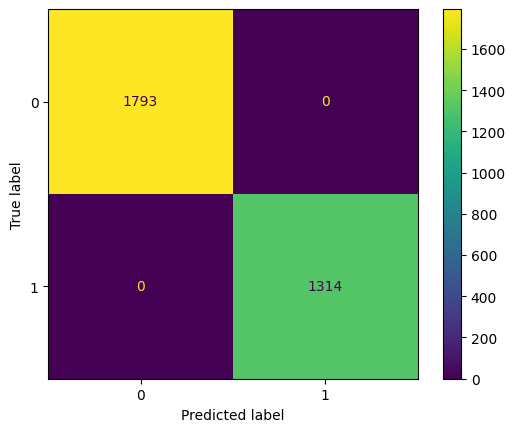

In [ ]:
cm3 = confusion_matrix(y_test31,clf2.predict(X_test31), labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=clf2.classes_)
disp.plot()
plt.show()

**Multi-class Classification**  
Classify walking(1), walking_upstairs(2), walking_downstairs(3), sitting(4), standing(5), lying(6) and static postural transition(7)  

The following models are included:  

(1) Support Vector Machine with kenel: linear, poly, rbf, sigmoid. 

(2) Decision Tree 

(3) Guassian Naive Bayes 

(4) K-Nearest Neighbors 

(5) Logistic Regression 

(6) Linear Discriminant Analysis 

(7) Quadratic Discriminant Analysis  

(8) Random Forest  

(9) Voting Classifier 

(10) Neutral Network 

(11) Bagging Classifier  

(12) AdaBoost Classifier 

(13) Gaussian Process Classifier with RBF kernel  

(14) SGD Classifier 

(15) Multinomial Logistic Regression

**Step 1: Enable Data**

In [8]:
dataset2=dataset
List3=['7','8','9','10','11','12']
dataset2["V0"] = np.where(dataset2['V2'].isin(List3),'7',dataset2['V2'])

ytrain2=dataset2["V0"]
ytrain2=ytrain2[1:]
xtrain2=dataset2.iloc[1:,3:564]
xtrain2

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V554,V555,V556,V557,V558,V559,V560,V561,V562,V563
1,0.043579674,-0.005970221,-0.035054344,-0.99538116,-0.988365863,-0.937382005,-0.995007045,-0.988815577,-0.953325201,-0.794796369,...,-0.012235894,-0.314848353,-0.713307812,-0.112754341,0.030400372,-0.464761386,-0.018445884,-0.841558511,0.179912811,-0.051718416
2,0.039480037,-0.002131276,-0.029067362,-0.998347999,-0.982944945,-0.971272882,-0.998701962,-0.983314831,-0.973999847,-0.802536649,...,0.202803809,-0.603199224,-0.860676901,0.053476955,-0.007434566,-0.73262621,0.703510588,-0.845092399,0.18026111,-0.047436337
3,0.039977781,-0.005152716,-0.022650708,-0.995482127,-0.977313843,-0.984759524,-0.996414838,-0.975834798,-0.985973003,-0.798477173,...,0.440079356,-0.40442749,-0.761847228,-0.118559255,0.177899475,0.100699208,0.808529075,-0.849230131,0.180609558,-0.042271363
4,0.039784558,-0.011808778,-0.028915779,-0.9961941,-0.988568594,-0.993255602,-0.996994335,-0.988526428,-0.993135403,-0.798477173,...,0.43089077,-0.13837282,-0.491604347,-0.036787973,-0.012892494,0.640011043,-0.485366445,-0.848946592,0.181907092,-0.040826223
5,0.038758138,-0.002288533,-0.023862885,-0.998241335,-0.986774135,-0.993115488,-0.998215924,-0.98647918,-0.993824553,-0.801981534,...,0.137734624,-0.366213617,-0.702489762,0.123320048,0.122541962,0.693578288,-0.615970609,-0.848164,0.185123692,-0.037079903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,0.048048374,-0.042445161,-0.065884336,-0.195447967,-0.278326363,-0.219953526,-0.282233132,-0.305861471,-0.357803275,0.267874057,...,-0.008380747,-0.596760198,-0.879025634,-0.190436861,0.829718416,0.206972154,-0.425618579,-0.792291739,0.238580336,0.056019937
7764,0.037638604,0.006430371,-0.044344723,-0.235372031,-0.30268012,-0.232843488,-0.322482719,-0.354463664,-0.345592459,0.181270735,...,0.209451833,-0.404417928,-0.684496226,0.064906712,0.875679049,-0.879032789,0.40021936,-0.772287652,0.252652789,0.056251833
7765,0.037450938,-0.002724424,0.021009408,-0.2182808,-0.37808216,-0.076950379,-0.304446475,-0.400661352,-0.19307138,0.113140826,...,0.237002763,0.000206574,-0.317314291,0.052805928,-0.266724365,0.864404011,0.701168816,-0.779566335,0.249121453,0.047070771
7766,0.044011045,-0.004535781,-0.051242204,-0.219202106,-0.38334992,-0.08103469,-0.310418503,-0.380233454,-0.201006871,0.166670564,...,0.069365726,0.037918739,-0.356579108,-0.101360118,0.700739689,0.936673944,-0.58947895,-0.78560327,0.246408672,0.031700029


**Step 2: Split data**

In [9]:
#I tried several ways to split the data, including 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4. 
#Considering the limited space here, this version of code only including the 0.4, 
#which meeans divide the data into train(60%) and test(40%) data. 
#You can easily change the fraction as you want.
X_train32, X_test32, y_train32, y_test32 = train_test_split(xtrain2, ytrain2 , test_size=0.4, random_state=0)

**Step 3: Build base model**

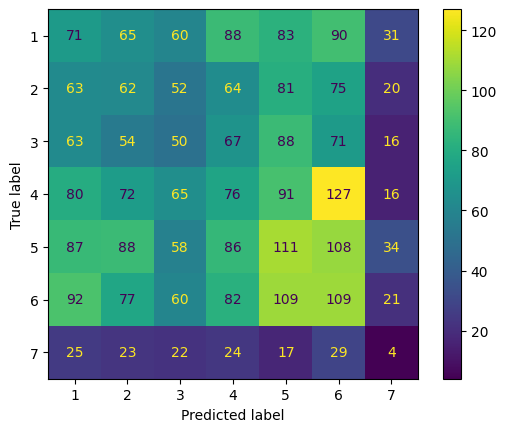

In [7]:
# Initialize Estimator
dummy_clf2 = DummyClassifier(strategy='stratified')
dummy_clf2.fit(X_train32,y_train32)

# Check for Model Accuracy

cm2 = confusion_matrix(y_test32,dummy_clf2.predict(X_test32), labels=dummy_clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=dummy_clf2.classes_)
disp.plot()
plt.show()

**Step 4: Obtain optimal parameters**

In [10]:
# create decision tree classifier
dtc = DecisionTreeClassifier()

# define parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

# perform grid search
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(X_train32, y_train32)

# print optimal parameters
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Define the parameter grid for random_state
param_grid = {'random_state': range(0, 101)}

# Define the SVM classifier
svc = SVC()

# Define the grid search object
grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train32, y_train32)

# Print the best random_state parameter value and the corresponding mean test score
print('Best random_state:', grid_search.best_params_['random_state'])
print('Mean test score:', grid_search.best_score_)

In [ ]:
# create KNN classifier
knn = KNeighborsClassifier()

# define parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train32, y_train32)

# print optimal parameters
print(grid_search.best_params_)

In [ ]:
# create LDA classifier
lda = LinearDiscriminantAnalysis()

# define parameter grid
param_grid = {
    'solver': ['svd', 'lsqr'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
    'n_components': [1, 2, 3]
}

# perform grid search
grid_search = GridSearchCV(lda, param_grid, cv=5)
grid_search.fit(X_train32, y_train32)

# print optimal parameters
print(grid_search.best_params_)

In [ ]:
# create QDA classifier
qda = QuadraticDiscriminantAnalysis()

# define parameter grid
param_grid = {
    'reg_param': [0.0, 0.1, 0.5, 0.9]
}

# perform grid search
grid_search = GridSearchCV(qda, param_grid, cv=5)
grid_search.fit(X_train32, y_train32)

# print optimal parameters
print(grid_search.best_params_)

In [ ]:
# create logistic regression classifier
lr = LogisticRegression()

# define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# perform grid search
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train32, y_train32)

# print optimal parameters
print(grid_search.best_params_)

In [ ]:
# Define the parameter grid to search over
param_grid = {
    'max_depth': [5, 10, 20],
    'class_weight': [None, 'balanced'],
    'n_jobs': [-1, 1, 2],
    'random_state': [0,42, 123, 456]
}

# Create the random forest classifier
clf = RandomForestClassifier()

# Perform the grid search using cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train32, y_train32)

# Print the best hyperparameters and the corresponding validation score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Validation score: {grid_search.best_score_:.2f}")

In [ ]:
# define parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

# create SVM classifier
svc = SVC()

# perform grid search
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train32, y_train32)

# print optimal parameters
print(grid_search.best_params_)

**Step 5: Training data evaluation**

In [9]:
# Build multiple classifiers
svm0 = LinearSVC()
dt = DecisionTreeClassifier( max_depth=4, min_samples_leaf= 2,min_samples_split= 4)
nb = GaussianNB()
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
lr = LogisticRegression(random_state=22)
# adab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100)
lda = LinearDiscriminantAnalysis(n_components=1, shrinkage=None, solver='svd')
qda = QuadraticDiscriminantAnalysis(reg_param= 0.1)
#xgb = xgb.XGBClassifier()
svm2 = SVC(random_state=0)
clf = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=0)
svm3 = SVC(C=0.1,gamma=0.1,kernel='linear')
svm4 = SVC(kernel='poly')
svm5 = SVC(kernel='rbf')
svm6 = SVC(kernel='sigmoid')
# Define the ensemble classifier
ensemble = VotingClassifier(estimators=[('dt', svm0), ('lr', svm3), ('svm', svm4)], voting='hard')


# Train the classifiers on the training set
svm0.fit(X_train32, y_train32)
svm3.fit(X_train32, y_train32)
svm4.fit(X_train32, y_train32)
svm5.fit(X_train32, y_train32)
svm6.fit(X_train32, y_train32)
dt.fit(X_train32, y_train32)
nb.fit(X_train32, y_train32)
knn.fit(X_train32, y_train32)
lr.fit(X_train32, y_train32)
#adab.fit(X_train32, y_train32)
lda.fit(X_train32, y_train32)
qda.fit(X_train32, y_train32)
#xgb.fit(X_train31, y_train31)
clf.fit(X_train32, y_train32)
ensemble.fit(X_train32, y_train32)

# Predict the test set using the trained classifiers
svm0_pred = svm0.predict(X_test32)
svm3_pred = svm3.predict(X_test32)
svm4_pred = svm4.predict(X_test32)
svm5_pred = svm5.predict(X_test32)
svm6_pred = svm6.predict(X_test32)

dt_pred = dt.predict(X_test32)
nb_pred = nb.predict(X_test32)
knn_pred = knn.predict(X_test32)
lr_pred = lr.predict(X_test32)
#adab_pred = adab.predict(X_test32)
lda_pred = lda.predict(X_test32)
qda_pred = qda.predict(X_test32)
#xgb_pred = xgb.predict(X_test31)
clf_pred = clf.predict(X_test32)
ensemble_pred = ensemble.predict(X_test32)

# Evaluate the accuracy of each classifier on the test set
svm0_acc = accuracy_score(y_test32, svm0_pred)
svm3_acc = accuracy_score(y_test32, svm3_pred)
svm4_acc = accuracy_score(y_test32, svm4_pred)
svm5_acc = accuracy_score(y_test32, svm5_pred)
svm6_acc = accuracy_score(y_test32, svm6_pred)

dt_acc = accuracy_score(y_test32, dt_pred)
nb_acc = accuracy_score(y_test32, nb_pred)
knn_acc = accuracy_score(y_test32, knn_pred)
lr_acc = accuracy_score(y_test32, lr_pred)
#adab_acc = accuracy_score(y_test32, adab_pred)
lda_acc = accuracy_score(y_test32, lda_pred)
qda_acc = accuracy_score(y_test32, qda_pred)
#xgb_acc = accuracy_score(y_test31, xgb_pred)
clf_acc = accuracy_score(y_test32, clf_pred)
ensemble_acc = accuracy_score(y_test32, ensemble_pred)

print('svm0 Classifier accuracy:', svm0_acc)
print('svm3 Classifier accuracy:', svm3_acc)
print('svm4 Classifier accuracy:', svm4_acc)
print('svm5 Classifier accuracy:', svm5_acc)
print('svm6 Classifier accuracy:', svm6_acc)

print('dt Classifier accuracy:', dt_acc)
print('nb Classifier accuracy:', nb_acc)
print('K-Nearest Neighbors Classifier accuracy:', knn_acc)
print('Logistic Regression Classifier accuracy:', lr_acc)
#print('adab Classifier accuracy:', adab_acc)
print('lda Classifier accuracy:', lda_acc)
print('qda Classifier accuracy:', qda_acc)
#print('xgb Classifier accuracy:', xgb_acc)
print('clf Classifier accuracy:', clf_acc)
print('ensemble Classifier accuracy:', ensemble_acc)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.war

svm0 Classifier accuracy: 0.9851947215963952
svm3 Classifier accuracy: 0.9868039909880915
svm4 Classifier accuracy: 0.9880914065014483
svm5 Classifier accuracy: 0.9703894431927905
svm6 Classifier accuracy: 0.7985194721596395
dt Classifier accuracy: 0.8361763759253299
nb Classifier accuracy: 0.6369488252333441
K-Nearest Neighbors Classifier accuracy: 0.9510782104924365
Logistic Regression Classifier accuracy: 0.9839073060830383
lda Classifier accuracy: 0.9803669134213068
qda Classifier accuracy: 0.9114901834567106
clf Classifier accuracy: 0.9732861280978435
ensemble Classifier accuracy: 0.989056968136466


In [10]:
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train32, y_train32)
bg_pred = bg.predict(X_test32)
bg_acc = accuracy_score(y_test32, bg_pred)
print('bg Classifier accuracy:', bg_acc)

bg Classifier accuracy: 0.9559060186675249


In [11]:
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train32, y_train32)
adb_pred = adb.predict(X_test32)
adb_acc = accuracy_score(y_test32, adb_pred)
print('adb Classifier accuracy:', adb_acc)

adb Classifier accuracy: 0.918892822658513


In [12]:
rf = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=0)
rf.fit(X_train32, y_train32)
rf_pred = rf.predict(X_test32)
rf_acc = accuracy_score(y_test32, rf_pred)
print('rf Classifier accuracy:', rf_acc)

rf Classifier accuracy: 0.9732861280978435


In [ ]:
# Create a Gaussian Process Classifier with RBF kernel
kernel = 1.0 * RBF(length_scale=1.0)
clf = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Train the classifier on the training data
clf.fit(X_train32, y_train32)

# Predict the class labels for the test data
y_pred = clf.predict(X_test32)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test32, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
# Create an SGD Classifier with logistic loss function
clf = SGDClassifier(loss='log', penalty='l2', max_iter=1000, random_state=42)

# Train the classifier on the training data
clf.fit(X_train32, y_train32)

# Predict the class labels for the test data
y_pred = clf.predict(X_test32)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test32, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
# Create an SGD Classifier
clf = SGDClassifier(random_state=42)

# Define a grid of hyperparameters to search over
param_grid = {'loss': ['log', 'hinge'], 
              'penalty': ['l1', 'l2', 'elasticnet'], 
              'alpha': [0.0001, 0.001, 0.01], 
              'max_iter': [1000, 2000, 3000], 
              'learning_rate': ['constant', 'optimal', 'invscaling']}

# Use grid search to find the best set of hyperparameters
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X_train32, y_train32)

# Print the best set of hyperparameters and the corresponding accuracy score
print(f"Best Parameters: {grid_search.best_params_}")
y_pred = grid_search.predict(X_test32)
accuracy = accuracy_score(y_test32, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
# Create a Multinomial Logistic Regression classifier
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the classifier on the training set
lr.fit(X_train32, y_train32)

# Make predictions on the testing set
y_pred = lr.predict(X_test32)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test32, y_pred)
print(f"Accuracy: {accuracy}")

Prepare data for network model

In [ ]:
xtrain = xtrain.apply(pd.to_numeric, errors='coerce')

# print the converted DataFrame
print(xtrain)
xtrain.dtypes

In [ ]:
xtest2 = xtest2.apply(pd.to_numeric, errors='coerce')
print(xtest2)
xtest2.dtypes

In [ ]:
ytrain = ytrain.apply(pd.to_numeric, errors='coerce')
print(ytrain)
ytrain.dtypes

In [ ]:
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

X_train32, X_test32, y_train32, y_test32 = train_test_split(xtrain, ytrain , test_size=0.4, random_state=0)

In [ ]:
X_train32 = X_train32.apply(pd.to_numeric)

# convert dataframe to numpy array
my_array = np.array(X_train32)

print(my_array)

In [ ]:
X_test32 = X_test32.apply(pd.to_numeric)

# convert dataframe to numpy array
my_arrayyt = np.array(X_test32)

print(my_arrayyt)

In [ ]:
import numpy as np
# convert object dtype columns to numeric
y_train32 = y_train32.apply(pd.to_numeric)

# convert dataframe to numpy array
my_arrayy = np.array(y_train32)

print(my_arrayy)

In [ ]:
y_test32 = y_test32.apply(pd.to_numeric)

# convert dataframe to numpy array
my_arrayytt = np.array(y_test32)

print(my_arrayytt)

In [ ]:
# create a sample dataset
X = my_array
y = my_arrayy
Xt = my_arrayyt
yt = my_arrayytt
# define the model architecture
model = Sequential()
model.add(Dense(16, input_dim=561, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(X, y, epochs=100, batch_size=10)

# evaluate the model
loss, accuracy = model.evaluate(Xt, yt)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

# make predictions
predictions = model.predict(Xt)
print("Predictions: ", predictions)

**Step 6: Obtain result on test data**

In [ ]:
#Only show the final chosen model here
ensemble = SVC(C=1,kernel='linear')
ensemble.fit(xtrain2, ytrain2)
# make a single prediction
ensemble.score(xtrain2,ytrain2)
yhat2 = ensemble.predict(xtest2)
yhat2
savetxt('linearsvmc1.csv', yhat2, delimiter=',',fmt='%s')

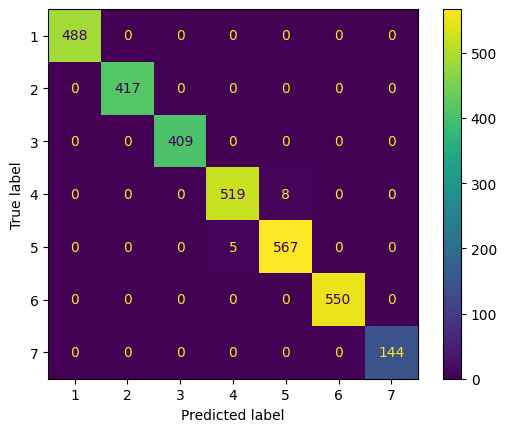

In [ ]:
cm4 = confusion_matrix(y_test32,ensemble.predict(X_test32), labels=ensemble.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=ensemble.classes_)
disp.plot()
plt.show()